In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests
from urllib import parse

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import xml.etree.ElementTree as ET

def ReadDataFromXML(key, url, dataPath, year):
  key = key
  key = parse.unquote(key)
  #-- encoder key value to decoder key value

  queryParams = '?' + parse.urlencode({
    'serviceKey' : key,
    'page' : 1,
    'perPage' : 10,
    'returnType' : "XML",
  })
  #-- Set queryParams

  url = url + queryParams
  #-- Set Url

  response = requests.get(url)
  response.status_code
  #-- 200 

  with open(dataPath, "w") as f:
    f.write(response.text)
  
  campXML = ET.parse(dataPath)
  root = campXML.getroot()
  currentCount = campXML.find("currentCount")
  totalCount = campXML.findtext("totalCount")
  data = campXML.find("data")
  items= data.findall("item")
  #-- test
  # ET.tostring(items[0], encoding = "UTF-8").decode()

  dataset = []
  dataset = DataSet(items, year)
  return dataset
  
def DataSet(items, year):
  dataset = []

  for item in items:
    male = 0
    female = 0
    unDefine = 0
    crime = 0
    arrest = 0
    category1 = ""
    category2 = ""
    category3 = "" 
    for info in item:
      # print(info.text) #-- 데이터 값 들어 있음
        colName = info.get("name")
        if colName == "검거인원(남자)":
          male = info.text
        if colName =="검거인원(여자)":
          female = info.text
        if colName =="검거인원(불상)":
          unDefine = info.text
        if colName =="전국(발생)":
          crime = info.text
        if colName == "전국(검거)":
          arrest = info.text
        if colName == "죄종(대)":
          category1 = info.text
        if colName == "죄종(중)":
          category2 = info.text
        if colName == "죄종(소)":
          category3 = info.text

    dataset.append({
        "Male" :male,
        "Female" : female,
        "UnDefine" : unDefine,
        "Crime" : crime,
        "Arrest" : arrest,
        "Category1" : category1,
        "Category2" : category2,
        "Category3" : category3,
      })
  return dataset

In [ ]:
key =  "IU%2FiwaExUBMui%2FFjciNT%2F4Md3b4RLulJyt6%2FAccAZ4V4EaVsLtIbqTn1V%2FzTBDc46%2BTlA%2B7iSEXYrzTLFrmMKw%3D%3D"
url =  "https://api.odcloud.kr/api/15064217/v1/uddi:5eb01115-6046-4320-84da-87b41ad58024"
dataPath = "/content/drive/MyDrive/Software/datasets/Kor_Police_2021_data.xml"
year = 2021
dataset1 = ReadDataFromXML(key,url,dataPath, year)

In [ ]:
df = pd.DataFrame(dataset1)
# df2 = pd.DataFrame(dataset2)
# df3 = pd.DataFrame(dataset3)

In [ ]:
df = df.dropna(axis=0)
# df2 = df2.dropna(axis=0)
# df3 = df3.dropna(axis=0)
#-- 결측 데이터 제거

In [ ]:
# df = pd.concat([df1,df2,df3],axis=0)
df = df.reset_index(drop= True)
df
#-- 데이터 합치기

,Male,Female,UnDefine,Crime,Arrest,Category1,Category2,Category3
0,305,72,3,340,326,강력범죄,살인(기수),살인
1,0,15,0,16,15,강력범죄,살인(기수),영아살해
2,27,6,0,32,32,강력범죄,살인(기수),존속살해
3,3,0,0,3,3,강력범죄,살인(기수),촉탁승락살인
4,15,8,0,20,19,강력범죄,살인(기수),자살교사방조
5,0,0,0,0,0,강력범죄,살인(기수),위계위력촉탁승락살인
6,532,60,9,559,551,강력범죄,살인(미수등),살인
7,0,0,0,0,0,강력범죄,살인(미수등),영아살해
8,17,2,0,18,18,강력범죄,살인(미수등),존속살해
9,0,1,0,1,1,강력범죄,살인(미수등),촉탁승락살인


In [ ]:
df.isnull().sum()
#-- 결측 데이터 확인

Male         0
Female       0
UnDefine     0
Crime        0
Arrest       0
Category1    0
Category2    0
Category3    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Male       5 non-null      object
 1   Female     5 non-null      object
 2   UnDefine   5 non-null      object
 3   Crime      5 non-null      object
 4   Arrest     5 non-null      object
 5   Category1  5 non-null      object
 6   Category2  5 non-null      object
 7   Category3  5 non-null      object
dtypes: object(8)
memory usage: 448.0+ bytes


In [ ]:
 df['Male'] = pd.to_numeric(df["Male"])
 df['Female'] = pd.to_numeric(df["Female"])
 df['UnDefine'] = pd.to_numeric(df["UnDefine"])
 df['Crime'] = pd.to_numeric(df["Crime"])
 df['Arrest'] = pd.to_numeric(df["Arrest"])
 df.dtypes
 #-- 정수형 데이터 변환

Male          int64
Female        int64
UnDefine      int64
Crime         int64
Arrest        int64
Category1    object
Category2    object
Category3    object
dtype: object

In [ ]:
df1 = df.drop(["UnDefine",], axis = 1)
df1
#-- 원인 불명 삭제

,Male,Female,Crime,Arrest,Category1,Category2,Category3
0,305,72,340,326,강력범죄,살인(기수),살인
1,0,15,16,15,강력범죄,살인(기수),영아살해
2,27,6,32,32,강력범죄,살인(기수),존속살해
3,3,0,3,3,강력범죄,살인(기수),촉탁승락살인
4,15,8,20,19,강력범죄,살인(기수),자살교사방조
5,0,0,0,0,강력범죄,살인(기수),위계위력촉탁승락살인
6,532,60,559,551,강력범죄,살인(미수등),살인
7,0,0,0,0,강력범죄,살인(미수등),영아살해
8,17,2,18,18,강력범죄,살인(미수등),존속살해
9,0,1,1,1,강력범죄,살인(미수등),촉탁승락살인


In [ ]:
df1.corr()
#-- 상관관계 확인

#-- C.f. 상관관계의 계수
#-- - x와 y가 상관관계가 있다고 하면, x가 변할 때 y가 변하는 것을 의미한다.
#-- - 얼마나 변하냐와 관련한 것이 상관관계의 계수이다.
#-- - 보통 계수가 0.2 이하이면 상관관계가 없거나 무시해도 좋은 수준
#-- - 0.4 이하는 약한 상관관계
#-- - 0.4 이상은 강한 상관관계

,Male,Female,Crime,Arrest
Male,1.000000,0.903980,0.999312,0.999621
Female,0.903980,1.000000,0.918325,0.912998
Crime,0.999312,0.918325,1.000000,0.999904
Arrest,0.999621,0.912998,0.999904,1.000000


In [ ]:
# dfMan1 = df1.drop(["Female", "Arrest"], axis = 1)
# dfMan1 = dfMan1.groupby(["Male", "Category1", "Category2","Category3","Crime"]).count()
# dfMan1 = dfMan1.sort_values(by='Category1' ,ascending=False)
# dfMan1

# dfMan2 = df1.drop(["Female", "Crime"], axis = 1)
# dfMan2 = dfMan2.groupby(["Male", "Category1", "Category2","Category3","Arrest"]).count()
# dfMan2 = dfMan2.sort_values(by='Category1' ,ascending=False)
# dfMan2

# dfWomen1 = df1.drop(["Male", "Arrest"], axis = 1)
# dfWomen1 = dfWomen1.groupby(["Female", "Category1", "Category2","Category3","Crime"]).count()
# dfWomen1 = dfWomen1.sort_values(by='Category1' ,ascending=False)

# dfWomen2 = df1.drop(["Male", "Crime"], axis = 1)
# dfWomen2 = dfWomen2.groupby(["Female", "Category1", "Category2","Category3","Arrest"]).count()
# dfWomen2 = dfWomen2.sort_values(by='Category1' ,ascending=False)

# dfMan1 = dfMan1.reset_index()
# dfMan2 = dfMan2.reset_index()
# dfWomen1 = dfWomen1.reset_index()
# dfWomen2 = dfWomen2.reset_index()

# dfMan1["Ratio"] = dfMan1["Male"] / dfMan1["Crime"]
# dfMan2["Ratio"] = dfMan2["Male"] / dfMan2["Arrest"]
# dfWomen1["Ratio"] = dfWomen1["Female"] / dfWomen1["Crime"]
# dfWomen2["Ratio"] = dfWomen2["Female"] / dfWomen2["Arrest"]
# dfMan1

# dfMan1 = dfMan1.reset_index()
# dfMan2 = dfMan2.reset_index()
# dfWomen1 = dfWomen1.reset_index()
# dfWomen2 = dfWomen2.reset_index()

# dfMan1.set_index(["Category1",'Category2',"Category3"], inplace = True)
# dfMan2.set_index(["Category1",'Category2',"Category3"], inplace = True)
# dfWomen1.set_index(["Category1",'Category2',"Category3"], inplace = True)
# dfWomen2.set_index(["Category1",'Category2',"Category3"], inplace = True)
# dfMan1

In [ ]:
dfCrime =  df1.drop(["Arrest"], axis = 1)
dfCrime = dfCrime.sort_values(by='Category1' ,ascending=False)
#-- 남여 범죄 분할

dfArrest = df1.drop(["Crime"], axis = 1)
dfArrest = dfArrest.sort_values(by='Category1' ,ascending=False)
#-- 남여 검거 분할

dfCrime["CrimeRatioMan"] = dfCrime["Male"] / dfCrime["Crime"]
dfCrime["CrimeRatioWomen"] = dfCrime["Female"] / dfCrime["Crime"]
#-- 남여 범죄별 비율 

dfArrest["ArrestRatioMan"] = dfArrest["Male"] / dfArrest["Arrest"]
dfArrest["ArrestRatioWomen"] = dfArrest["Female"] / dfArrest["Arrest"]
#-- 남여 범죄별 검거 비율

dfCrime.set_index(["Category1",'Category2',"Category3"], inplace = True)
dfArrest.set_index(["Category1",'Category2',"Category3"], inplace = True)
#-- 범죄별로 정렬

dfCrime.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, ('강력범죄', '살인(기수)', '살인') to ('강력범죄', '살인(미수등)', '촉탁승락살인')
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Male             10 non-null     int64  
 1   Female           10 non-null     int64  
 2   Crime            10 non-null     int64  
 3   CrimeRatioMan    8 non-null      float64
 4   CrimeRatioWomen  8 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 1.0+ KB


In [ ]:
dfCrime.head()

Male  Female  Crime  CrimeRatioMan  \
Category1 Category2 Category3                                       
강력범죄      살인(기수)    살인          305      72    340       0.897059   
                    영아살해          0      15     16       0.000000   
                    존속살해         27       6     32       0.843750   
                    촉탁승락살인        3       0      3       1.000000   
                    자살교사방조       15       8     20       0.750000   

                               CrimeRatioWomen  
Category1 Category2 Category3                   
강력범죄      살인(기수)    살인                0.211765  
                    영아살해              0.937500  
                    존속살해              0.187500  
                    촉탁승락살인            0.000000  
                    자살교사방조            0.400000

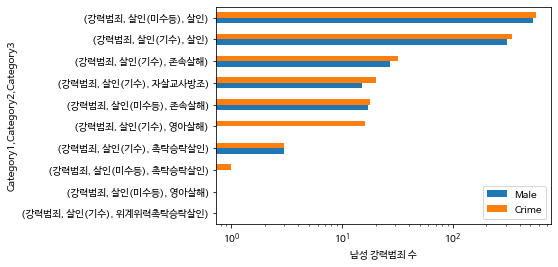

In [ ]:
maleCrimeDf = dfCrime[["Male","Crime",]]
maleCrimeDf
maleCrimeDf.sort_values(
  by='Crime', ascending=True).plot(kind="barh", logx=True)
plt.xlabel("남성 강력범죄 수")
plt.legend(loc='lower right')
plt.show()

#-- 일어난 범죄 중 남성이 저지른 횟수

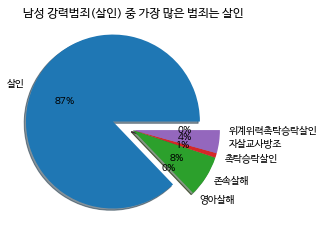

In [ ]:
# print(maleDF.index)
label = maleCrimeDf.loc[('강력범죄','살인(기수)' )]
#-- 강력범죄, 살인(기수)로 분할
label = label.reset_index()
labels = label["Category3"].value_counts().index.tolist()
labels
male = label["Male"]
fracs1 =  male.values
fracs1
explode = (0.25,0,0,0,0,0)

plt.pie(fracs1,explode = explode,
        labels = labels, autopct ="%0.0f%%",shadow =True,
        )
plt.title("남성 강력범죄(살인) 중 가장 많은 범죄는 살인")
plt.show()

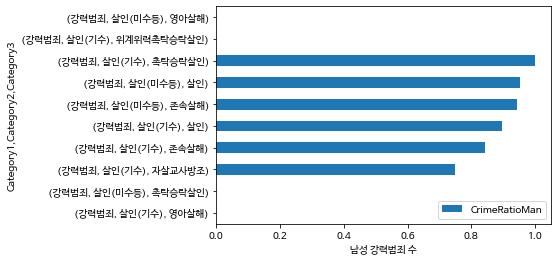

In [ ]:
maleCrimeRatioDf = dfCrime[["CrimeRatioMan",]]
maleCrimeRatioDf
maleCrimeRatioDf.sort_values(
  by='CrimeRatioMan', ascending=True).plot(kind="barh", )
plt.xlabel("남성 강력범죄 수")
plt.legend(loc='lower right')
plt.show()

#-- 일어난 범죄 중 남성이 저지른 횟수

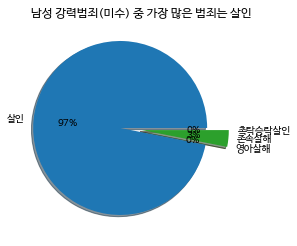

In [ ]:
# print(maleDF.index)
label = maleCrimeDf.loc[('강력범죄','살인(미수등)' )]
#-- 강력범죄, 살인(기수)로 분할
label = label.reset_index()
labels = label["Category3"].value_counts().index.tolist()
labels
male = label["Male"]
fracs1 =  male.values
fracs1
explode = (0.25,0,0,0)

plt.pie(fracs1,explode = explode,
        labels = labels, autopct ="%0.0f%%",shadow =True,
        )
plt.title("남성 강력범죄(미수) 중 가장 많은 범죄는 살인")
plt.show()

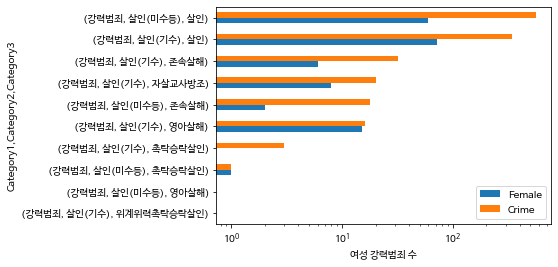

In [ ]:
femaleCrimeDf = dfCrime[["Female","Crime",]]
# maleDF
femaleCrimeDf.sort_values(
  by='Crime', ascending=True).plot(kind="barh", logx=True)
plt.xlabel("여성 강력범죄 수")
plt.legend(loc='lower right')
plt.show()
#-- 일어난 범죄 중 여성이 저지른 횟수

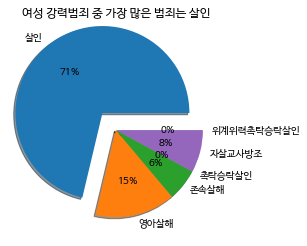

In [ ]:
# print(maleDF.index)
label = femaleCrimeDf.loc[('강력범죄','살인(기수)' )]
#-- 강력범죄, 살인(기수)로 분할
label = label.reset_index()
labels = label["Category3"].value_counts().index.tolist()
male = label["Female"]
fracs1 =  male.values
explode = (0.25,0,0,0,0,0)

plt.pie(fracs1,explode = explode,
        labels = labels, autopct ="%0.0f%%",shadow =True,
        )
plt.title("여성 강력범죄 중 가장 많은 범죄는 살인")
plt.show()

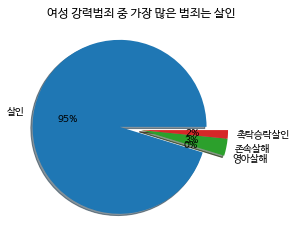

In [ ]:
# print(maleDF.index)
label = femaleCrimeDf.loc[('강력범죄','살인(미수등)' )]
#-- 강력범죄, 살인(기수)로 분할
label = label.reset_index()
labels = label["Category3"].value_counts().index.tolist()
male = label["Female"]
fracs1 =  male.values
explode = (0.25,0,0,0)

plt.pie(fracs1,explode = explode,
        labels = labels, autopct ="%0.0f%%",shadow =True,
        )
plt.title("여성 강력범죄(미수) 중 가장 많은 범죄는 살인")
plt.show()

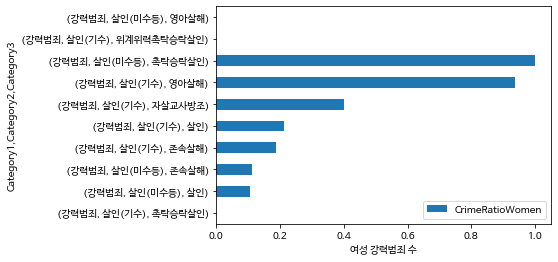

In [ ]:
femaleCrimeRatioDf = dfCrime[["CrimeRatioWomen",]]
femaleCrimeRatioDf
femaleCrimeRatioDf.sort_values(
  by='CrimeRatioWomen', ascending=True).plot(kind="barh", )
plt.xlabel("여성 강력범죄 수")
plt.legend(loc='lower right')
plt.show()

#-- 일어난 범죄 중 여성이 저지른 횟수

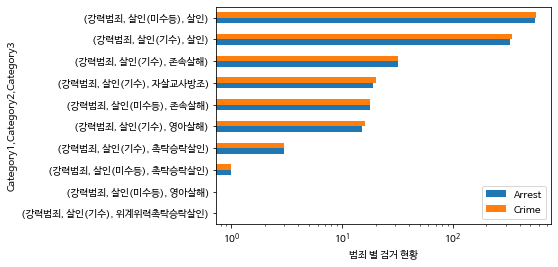

In [ ]:
Arrest = df1.drop(["Male","Female"], axis = 1)
Arrest = Arrest.sort_values(by='Category1' ,ascending=False)
Arrest.set_index(["Category1",'Category2',"Category3"], inplace = True)
ArrestDf = Arrest[["Arrest","Crime",]]
# ArrestDf

ArrestDf.sort_values(
  by='Crime', ascending=True).plot(kind="barh", logx=True,)
plt.xlabel("범죄 별 검거 현황")
plt.legend(loc='lower right')

plt.show()